In [ ]:
import os
import json
import statistics
names = ['FuzzyLogicAI','LDTAI','LevellingAI','RandomAI']

# for i in range(10):
#     path = ""
#     file = open(path+".txt", 'r')


raw_dicts = {}
reshuffle_ratios = {}
filenames = {}
max_block_utilizations = {}
results = {}
for name in names:
    reshuffle_ratios[name] = []
    raw_dicts[name] = []
    filenames[name] = []
    max_block_utilizations[name] = []
    results[name] = {}
cwd = os.getcwd()
for root, dirs, files in os.walk(cwd):

    for fil in files:
        for ai_name in names:
            if ai_name in fil:
                filenames[ai_name].append(fil)

for a_name in names:
    for filename in filenames[a_name]:
        raw_dicts[a_name].append(json.loads(open(filename,'r').read()))
for n in names:
    for snapshot in raw_dicts[n]:
        max_block_utilizations[n].append(snapshot['max_block_utilization'])
        # print(snapshot['relocation_ratio'])
        reshuffle_ratios[n].append(snapshot['relocation_ratio'])
        # print(reshuffle_ratios[n])
# print(f"reshi: {reshuffle_ratios['LevellingAI']}")
# print(f" type: {type(reshuffle_ratios['LevellingAI'])} ")
# print(f" len: {len(reshuffle_ratios['LevellingAI'])} ")
for nn in names:
    # print(nn)
    # print(f"here: {len(reshuffle_ratios[nn])}")
    avg_reshuffle_ratio = sum(reshuffle_ratios[nn])/len(reshuffle_ratios[nn])
    stdev_reshuffle_ratio = statistics.stdev(reshuffle_ratios[nn])
    results[nn]['avg_relocation_ratio'] = avg_reshuffle_ratio
    results[nn]['stdev_relocation_ratio']  = stdev_reshuffle_ratio

    avg_max_block_utilization = sum(max_block_utilizations[nn])/len(max_block_utilizations[nn])
    stdev_max_block_utilization = statistics.stdev(max_block_utilizations[nn])
    results[nn]['avg_max_block_utilization'] = avg_max_block_utilization
    results[nn]['stdev_max_block_utilization']  = stdev_max_block_utilization

print(json.dumps(results))

# print(f"reshuffle ratios: {reshuffle_ratios['LevellingAI']}")
# print(f"average reshuffle ratio: {sum(reshuffle_ratios['LevellingAI'])/len(reshuffle_ratios['LevellingAI'])}")
# print(f"stdev reshuffle ratio: {statistics.stdev(reshuffle_ratios['LevellingAI'])}")
# print(f"average max_block_utilization: {sum(max_block_utilizations['LevellingAI'])/len(max_block_utilizations['LevellingAI'])}")
# print(f"stdev max_block_utilizations: {statistics.stdev(max_block_utilizations['LevellingAI'])}")



In [ ]:
import pandas as pd

df = pd.DataFrame(dict(name=['Raphael', 'Donatello'],

                       age=[26, 45],

                       height=[181.23, 177.65]))

print(df.to_latex(index=False,

                  formatters={"name": str.upper},

                  float_format="{:.1f}".format,

))  

In [ ]:
accuracy_ints = list(range(10,110,10))
accuracy_strs = [str(x) for x in accuracy_ints]


import os
import json
import statistics

names = ['FuzzyLogicAI','LDTAI','LevellingAI','RandomAI']
tests_ints = list(range(10))
test_strs = [str(x) for x in tests_ints]
accuracy_strs = ['10', '20', '30', '40', '50', '60', '70', '80', '90', '100']
congestion_ratios = ['0','50','80']


# dir_dicts = {}
# relocation_ratios = {}
# max_block_utilizations = {}
cwd = os.getcwd()
results_by_congestion_ratio_accuracy = {}
results_by_accuracy = {} #only for ldtAI, fuzzyLogicAI, goes by test

for congestion_ratio in congestion_ratios:
    results_by_congestion_ratio_accuracy[congestion_ratio] = {}
    for accuracy in accuracy_strs:
        results_by_congestion_ratio_accuracy[congestion_ratio][accuracy] = {}
        for name in names:
            results_by_congestion_ratio_accuracy[congestion_ratio][accuracy][name] = {}
            relocation_ratios = []
            max_block_utilizations = []
            for test in test_strs:
                filename = f"results_{name}_{congestion_ratio}_{accuracy}_{test}"
                path = os.path.join(cwd,filename)
                file = json.loads(open(path,'r').read())
                relocation_ratio = file["relocation_ratio"]
                max_block_utilization = file["max_block_utilization"]
                relocation_ratios.append(relocation_ratio)
                max_block_utilizations.append(max_block_utilization)

            average_relocation_ratio = sum(relocation_ratios)/len(relocation_ratios)
            stdev_relocation_ratios = statistics.stdev(relocation_ratios)

            average_max_block_utilization = sum(max_block_utilizations)/len(max_block_utilizations)
            stdev_max_block_utilization = statistics.stdev(max_block_utilizations)

            results_by_congestion_ratio_accuracy[congestion_ratio][accuracy][name]['average_relocation_ratio'] = average_relocation_ratio
            results_by_congestion_ratio_accuracy[congestion_ratio][accuracy][name]['stdev_relocation_ratios'] = stdev_relocation_ratios
            results_by_congestion_ratio_accuracy[congestion_ratio][accuracy][name]['average_max_block_utilization'] = average_max_block_utilization
            results_by_congestion_ratio_accuracy[congestion_ratio][accuracy][name]['stdev_max_block_utilization'] = stdev_max_block_utilization    

           
    cwd = os.getcwd()
    results_name = f"results_summary_{congestion_ratio}_{accuracy}.json"

    with open(results_name, 'w', encoding='utf-8') as f:
        json.dump(results_by_congestion_ratio_accuracy[congestion_ratio][accuracy], f, ensure_ascii=False, indent=4)


# for n in names:
#     dir_dicts[n] = {}
#     relocation_ratios[n] = {}
#     max_block_utilizations[n] = {}
#     for congestion_ratio in congestion_ratios:
#         dir_dicts[n][congestion_ratio] = {}
#         for a in accuracy_strs:
#             dir_dicts[n][congestion_ratio][a] = {}
#             for t in test_strs:
#                 dir_dicts[n][congestion_ratio][a][t] = ""


cwd = os.getcwd()
folder = os.path.join(cwd,'results')
for name in names:
    for accuracy in accuracy_strs:
        for test in successful_tests:
            file_name = f"snapshots_{name}_{accuracy}_{test}.json"
            dir_dicts[name][accuracy][test] = os.path.join(folder,file_name)
# dir_dicts = {}
# for i in range(10):
#     path = ""
#     file = open(path+".txt", 'r')
relocation_ratios = {}
for nam in names:
    # print(nam)
    relocation_ratios[nam] = {}
    for acc in accuracy_strs:
        relocation_ratios[nam][acc] = []

print(relocation_ratios)
max_block_utilizations = {}
for nam in names:
    max_block_utilizations[nam] = {}
    for acc in accuracy_strs:
        max_block_utilizations[nam][acc] = []
# print(dir_dicts)
# print(relocation_ratios)
# print(max_block_utilizations)

for na, accs in dir_dicts.items():
    # print(na)
    for ac, tests in accs.items():
        # print(ac)
        for te, path in tests.items():
            file = json.loads(open(path,'r').read())
            relocation_ratio = file["relocation_ratio"]
            max_block_utilization = file["max_block_utilization"]
            relocation_ratios[na][ac].append(relocation_ratio)
            max_block_utilizations[na][ac].append(max_block_utilization)

results = {}
for nam in names:
    results[name] = {}
    for acc in accuracy_strs:
        results[name][acc] = {}
        for i in ['avg_relocation_ratio','stdev_relocation_ratio','avg_max_block_utilization','stdev_max_block_utilization']:
            results[name][acc][i] = 0

for name, accs in relocation_ratios.items():
    for acc, relocation_ratio_list in accs:
        results[name][acc]['avg_relocation_ratio'] = sum(relocation_ratio_list)/len(relocation_ratio_list)
        results[name][acc]['stdev_relocation_ratio'] = statistics.stdev(relocation_ratio_list)

for name, accs in max_block_utilizations.items():
    for acc, max_block_utilization_list in accs:
        results[name][acc]['avg_max_block_utilization'] = sum(max_block_utilization_list)/len(max_block_utilization_list)
        results[name][acc]['stdev_max_block_utilization'] = statistics.stdev(max_block_utilization_list)

print(json.dumps(results))

with open('results', 'w', encoding='utf-8') as f:
    json.dump(results, f, ensure_ascii=False, indent=4)

# raw_dicts = {}
# reshuffle_ratios = {}
# filenames = {}
# max_block_utilizations = {}
# results = {}
# for name in names:
#     reshuffle_ratios[name] = []
#     raw_dicts[name] = []
#     filenames[name] = []
#     max_block_utilizations[name] = []
#     results[name] = {}
# cwd = os.getcwd()
# for root, dirs, files in os.walk(cwd):

#     for fil in files:
#         for ai_name in names:
#             if ai_name in fil:
#                 filenames[ai_name].append(fil)

# for a_name in names:
#     for filename in filenames[a_name]:
#         raw_dicts[a_name].append(json.loads(open(filename,'r').read()))
# for n in names:
#     for snapshot in raw_dicts[n]:
#         max_block_utilizations[n].append(snapshot['max_block_utilization'])
#         # print(snapshot['relocation_ratio'])
#         reshuffle_ratios[n].append(snapshot['relocation_ratio'])
#         # print(reshuffle_ratios[n])
# # print(f"reshi: {reshuffle_ratios['LevellingAI']}")
# # print(f" type: {type(reshuffle_ratios['LevellingAI'])} ")
# # print(f" len: {len(reshuffle_ratios['LevellingAI'])} ")
# for nn in names:
#     # print(nn)
#     # print(f"here: {len(reshuffle_ratios[nn])}")
#     avg_reshuffle_ratio = sum(reshuffle_ratios[nn])/len(reshuffle_ratios[nn])
#     stdev_reshuffle_ratio = statistics.stdev(reshuffle_ratios[nn])
#     results[nn]['avg_relocation_ratio'] = avg_reshuffle_ratio
#     results[nn]['stdev_relocation_ratio']  = stdev_reshuffle_ratio

#     avg_max_block_utilization = sum(max_block_utilizations[nn])/len(max_block_utilizations[nn])
#     stdev_max_block_utilization = statistics.stdev(max_block_utilizations[nn])
#     results[nn]['avg_max_block_utilization'] = avg_max_block_utilization
#     results[nn]['stdev_max_block_utilization']  = stdev_max_block_utilization

# print(json.dumps(results))

In [ ]:
accuracy_ints = list(range(10,110,10))
accuracy_strs = [str(x) for x in accuracy_ints]
print(accuracy_strs)

In [ ]:
string_test = """

\\begin{table}[H]
\\begin{tabular}{|cl|l|l|l|l|}
\hline
\multicolumn{1}{|l}{\\textbf{Accuracy}}               & \\textbf{}                              & \\textbf{RAND} & \\textbf{Levelling} & \\textbf{LDT} & \\textbf{Fuzzy} \\\\ \hline
\multicolumn{1}{|l|}{\\textbf{Congestion Ratio}}      & \\textbf{}                              &               &                    &              &                \\\\ \hline
\multicolumn{1}{|c|}{\multirow{4}{*}{\\textbf{0\%}}}  & \\textbf{Relocation Ratio}              &               &                    &              &                \\\\ \cline{2-6} 
\multicolumn{1}{|c|}{}                               & \\textbf{Relocation Ratio (Stdev)}      &               &                    &              &                \\\\ \cline{2-6} 
\multicolumn{1}{|c|}{}                               & \\textbf{Max block utilization}         &               &                    &              &                \\\\ \cline{2-6} 
\multicolumn{1}{|c|}{}                               & \\textbf{Max block utilization (Stdev)} &               &                    &              &                \\\\ \hline
\multicolumn{1}{|c|}{\multirow{4}{*}{\\textbf{50\%}}} & \\textbf{Relocation Ratio}              &               &                    &              &                \\\\ \cline{2-6} 
\multicolumn{1}{|c|}{}                               & \\textbf{Relocation Ratio (Stdev)}      &               &                    &              &                \\\\ \cline{2-6} 
\multicolumn{1}{|c|}{}                               & \\textbf{Max block utilization}         &               &                    &              &                \\\\ \cline{2-6} 
\multicolumn{1}{|c|}{}                               & \\textbf{Max block utilization (Stdev)} &               &                    &              &                \\\\ \hline
\multicolumn{1}{|c|}{\multirow{4}{*}{\\textbf{80\%}}} & \\textbf{Relocation Ratio}              &               &                    &              &                \\\\ \cline{2-6} 
\multicolumn{1}{|c|}{}                               & \\textbf{Relocation Ratio (Stdev)}      &               &                    &              &                \\\\ \cline{2-6} 
\multicolumn{1}{|c|}{}                               & \\textbf{Max block utilization}         &               &                    &              &                \\\\ \cline{2-6} 
\multicolumn{1}{|c|}{}                               & \\textbf{Max block utilization (Stdev)} &               &                    &              &                \\\\ \hline
\end{tabular}
\end{table}

"""

print(string_test)

In [15]:
import math

results_dict = {
    "0": {
        "FuzzyLogicAI": {
            "average_relocation_ratio": 0.2474035416885295,
            "stdev_relocation_ratios": 0.007380622156130875,
            "average_max_block_utilization": 0.32466666666666666,
            "stdev_max_block_utilization": 0.01335183900959982
        },
        "LDTAI": {
            "average_relocation_ratio": 0.3096115149934652,
            "stdev_relocation_ratios": 0.011207241034479246,
            "average_max_block_utilization": 0.438,
            "stdev_max_block_utilization": 0.03341471546903464
        },
        "LevellingAI": {
            "average_relocation_ratio": 0.27026928227729685,
            "stdev_relocation_ratios": 0.013644550165324114,
            "average_max_block_utilization": 0.392,
            "stdev_max_block_utilization": 0.017998628205614747
        },
        "RandomAI": {
            "average_relocation_ratio": 0.41826948416641363,
            "stdev_relocation_ratios": 0.009989531689608925,
            "average_max_block_utilization": 0.45266666666666666,
            "stdev_max_block_utilization": 0.028012342958501184
        }
    },
    "50": {
        "FuzzyLogicAI": {
            "average_relocation_ratio": 0.35317097493662636,
            "stdev_relocation_ratios": 0.011254659260135514,
            "average_max_block_utilization": 0.586,
            "stdev_max_block_utilization": 0.040788524166776426
        },
        "LDTAI": {
            "average_relocation_ratio": 0.42773629008129416,
            "stdev_relocation_ratios": 0.01671839996238633,
            "average_max_block_utilization": 0.5806666666666668,
            "stdev_max_block_utilization": 0.021418810240038225
        },
        "LevellingAI": {
            "average_relocation_ratio": 0.3795107082905146,
            "stdev_relocation_ratios": 0.012865014805334429,
            "average_max_block_utilization": 0.57,
            "stdev_max_block_utilization": 0.026527414191807375
        },
        "RandomAI": {
            "average_relocation_ratio": 0.4713186082803995,
            "stdev_relocation_ratios": 0.010194182363620607,
            "average_max_block_utilization": 0.588,
            "stdev_max_block_utilization": 0.020560059566614015
        }
    },
    "80": {
        "FuzzyLogicAI": {
            "average_relocation_ratio": 0.4456213319684593,
            "stdev_relocation_ratios": 0.004670102660528113,
            "average_max_block_utilization": 0.768,
            "stdev_max_block_utilization": 0.012090196007764828
        },
        "LDTAI": {
            "average_relocation_ratio": 0.5109304632962731,
            "stdev_relocation_ratios": 0.012191247781982828,
            "average_max_block_utilization": 0.852,
            "stdev_max_block_utilization": 0.026443510721144026
        },
        "LevellingAI": {
            "average_relocation_ratio": 0.48590446715820673,
            "stdev_relocation_ratios": 0.012006389954409525,
            "average_max_block_utilization": 0.8320000000000001,
            "stdev_max_block_utilization": 0.03232550497061009
        },
        "RandomAI": {
            "average_relocation_ratio": 0.5233943741932252,
            "stdev_relocation_ratios": 0.01033716672748521,
            "average_max_block_utilization": 0.852,
            "stdev_max_block_utilization": 0.03742317232892603
        }
    }
}

accuracy = "10"

def generate_latex_table(results_dict,accuracy):
    AI_names = ['FuzzyLogicAI','LDTAI','LevellingAI','RandomAI']
    congestion_ratios = ['0','50','80']
    
    first_string = """\\begin{table}
\centering
\\begin{tblr}{
  row{3} = {Hopbush},
  row{5} = {Hopbush},
  row{7} = {PictonBlue},
  row{9} = {PictonBlue},
  row{11} = {OrangePeel},
  row{13} = {OrangePeel},
  cell{3}{1} = {r=4}{c},
  cell{7}{1} = {r=4}{c},
  cell{11}{1} = {r=4}{c},
  vline{1,3-7} = {1}{},
  vline{-} = {2-3,7,11}{},
  vline{3-7} = {4-6,8-10,12-14}{},
  hline{1-3,7,11,15} = {-}{},
  hline{4-6,8-10,12-14} = {2-6}{},
}
"""

    header_string = """Accuracy                  &                 """+accuracy+"""                       & \\textbf{RAND} & \\textbf{Levelling} & \\textbf{LDT} & \\textbf{Fuzzy} \\\\
    \\textbf{Congestion} &                                        &               &                    &              &               \\\\
    """

    str_build = ""

    for congestion_ratio in congestion_ratios:
        str_build += generate_congestion_subtable(congestion_ratio, results_dict)
    
    

    final_string = """\end{tblr}
\end{table}
"""

    return first_string+header_string+str_build+final_string

def generate_congestion_subtable(congestion_ratio, results_dict):
    # results_types = ["average_relocation_ratio","stdev_relocation_ratios","average_max_block_utilization","stdev_max_block_utilization"]
    
    first_string = """\\textbf{"""+congestion_ratio+"""\% }             & \\textbf{Relocation r.}              &"""+generate_results_subtable("average_relocation_ratio",congestion_ratio,results_dict)
    
    second_string = """                          & \\textbf{Relocation r. (Stdev)}      &"""+generate_results_subtable("stdev_relocation_ratios",congestion_ratio,results_dict)

    third_string = """                          & \\textbf{Max b. util}         &"""+generate_results_subtable("average_max_block_utilization",congestion_ratio,results_dict)

    fourth_string = """                          & \\textbf{Max b. util. (Stdev)} &"""+generate_results_subtable("stdev_max_block_utilization",congestion_ratio,results_dict)
    # str_build = ""

    # for results_type in results_types:
    #     str_build +=generate_results_subtable(results_type,congestion_ratio,results_dict)
    
    return first_string+second_string+third_string+fourth_string

def generate_results_subtable(results_type, congestion_ratio, results_dict):
    string = f"""    {round(results_dict[congestion_ratio]['RandomAI'][results_type],3)}       &        {round(results_dict[congestion_ratio]['LevellingAI'][results_type],3)}        &    {round(results_dict[congestion_ratio]['LDTAI'][results_type],3)}       &     {round(results_dict[congestion_ratio]['FuzzyLogicAI'][results_type],3)}       \\\\
    """
    
    return string

string_t = generate_latex_table(results_dict, accuracy)

print(string_t)



\begin{table}
\centering
\begin{tblr}{
  row{3} = {Hopbush},
  row{5} = {Hopbush},
  row{7} = {PictonBlue},
  row{9} = {PictonBlue},
  row{11} = {OrangePeel},
  row{13} = {OrangePeel},
  cell{3}{1} = {r=4}{c},
  cell{7}{1} = {r=4}{c},
  cell{11}{1} = {r=4}{c},
  vline{1,3-7} = {1}{},
  vline{-} = {2-3,7,11}{},
  vline{3-7} = {4-6,8-10,12-14}{},
  hline{1-3,7,11,15} = {-}{},
  hline{4-6,8-10,12-14} = {2-6}{},
}
Accuracy                  &                 10                       & \textbf{RAND} & \textbf{Levelling} & \textbf{LDT} & \textbf{Fuzzy} \\
    \textbf{Congestion} &                                        &               &                    &              &               \\
    \textbf{0\% }             & \textbf{Relocation r.}              &    0.418       &        0.27        &    0.31       &     0.247       \\
                              & \textbf{Relocation r. (Stdev)}      &    0.01       &        0.014        &    0.011       &     0.007       \\
                      

In [ ]:
ai_name = "lol"
first_string = """\\begin{table}[H]
\centering
\\begin{tblr}{
  width = \linewidth,
  colspec = {Q[110]Q[148]Q[246]Q[162]Q[258]},
  column{3} = {PictonBlue},
  column{4} = {OrangePeel},
  column{5} = {DeepCerulean},
  cell{1}{2} = {c=4}{0.814\linewidth,c},
  cell{2}{2} = {Hopbush},
  cell{3}{2} = {Hopbush},
  cell{4}{2} = {Hopbush},
  cell{5}{2} = {Hopbush},
  cell{6}{2} = {Hopbush},
  cell{7}{2} = {Hopbush},
  cell{8}{2} = {Hopbush},
  cell{9}{2} = {Hopbush},
  cell{10}{2} = {Hopbush},
  cell{11}{2} = {Hopbush},
  cell{12}{2} = {Hopbush},
  hlines,
  vline{2-3} = {1}{},
  vline{-} = {2-12}{},
}
      & """+ai_name+"""       &                 &            &                  \\\\"""

In [17]:
def generate_results_subtable(results_dict,accuracy):

    string = accuracy+f"""\\%  &   {round(results_dict[accuracy]["average_relocation_ratio"],3) }       &      round(results_dict[accuracy]["stdev_relocation_ratios"],3)           &      round(results_dict[accuracy]["average_max_block_utilization"],3)      &        round(results_dict[accuracy]["stdev_max_block_utilization"],3)          \\\\
"""

    return string

accuracy = "10"

results_dict = {
    "10": {
        "average_relocation_ratio": 0.2474035416885295,
        "stdev_relocation_ratios": 0.007380622156130875,
        "average_max_block_utilization": 0.32466666666666666,
        "stdev_max_block_utilization": 0.01335183900959982
    },
    "20": {
        "average_relocation_ratio": 0.24628755036003228,
        "stdev_relocation_ratios": 0.006608975639095584,
        "average_max_block_utilization": 0.3213333333333333,
        "stdev_max_block_utilization": 0.013259052346823372
    },
    "30": {
        "average_relocation_ratio": 0.24812887191221905,
        "stdev_relocation_ratios": 0.008537882060530631,
        "average_max_block_utilization": 0.32266666666666666,
        "stdev_max_block_utilization": 0.014124665406285071
    },
    "40": {
        "average_relocation_ratio": 0.24712746449141781,
        "stdev_relocation_ratios": 0.010056427799038623,
        "average_max_block_utilization": 0.3226666666666667,
        "stdev_max_block_utilization": 0.015137232325267909
    },
    "50": {
        "average_relocation_ratio": 0.24646844283101968,
        "stdev_relocation_ratios": 0.008959675458231321,
        "average_max_block_utilization": 0.32200000000000006,
        "stdev_max_block_utilization": 0.012590413754858028
    },
    "60": {
        "average_relocation_ratio": 0.24473598896579,
        "stdev_relocation_ratios": 0.007387910100469191,
        "average_max_block_utilization": 0.32333333333333336,
        "stdev_max_block_utilization": 0.014487116456005885
    },
    "70": {
        "average_relocation_ratio": 0.24696723800354375,
        "stdev_relocation_ratios": 0.00860016759851482,
        "average_max_block_utilization": 0.3246666666666667,
        "stdev_max_block_utilization": 0.01572918966149901
    },
    "80": {
        "average_relocation_ratio": 0.24297760830097115,
        "stdev_relocation_ratios": 0.0074935235942613365,
        "average_max_block_utilization": 0.32466666666666666,
        "stdev_max_block_utilization": 0.01335183900959982
    },
    "90": {
        "average_relocation_ratio": 0.24157082099217728,
        "stdev_relocation_ratios": 0.009330700145793716,
        "average_max_block_utilization": 0.32533333333333336,
        "stdev_max_block_utilization": 0.013984117975602015
    },
    "100": {
        "average_relocation_ratio": 0.2416690150499236,
        "stdev_relocation_ratios": 0.008306705852317383,
        "average_max_block_utilization": 0.3226666666666667,
        "stdev_max_block_utilization": 0.014807405554629045
    }
}

string = generate_results_subtable(results_dict,accuracy)
print(string)

10\%  &   0.247       &      round(results_dict[accuracy]["stdev_relocation_ratios"],3)           &      round(results_dict[accuracy]["average_max_block_utilization"],3)      &        round(results_dict[accuracy]["stdev_max_block_utilization"],3)          \\



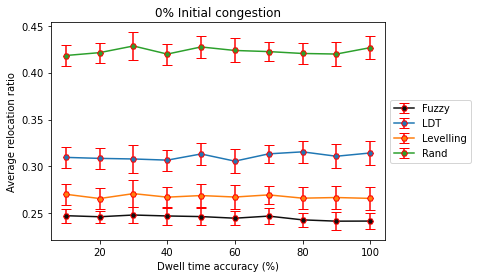

In [59]:
import matplotlib.pyplot as plt

results_dict = {
    "10": {
        "average_relocation_ratio": 0.2474035416885295,
        "stdev_relocation_ratios": 0.007380622156130875,
        "average_max_block_utilization": 0.32466666666666666,
        "stdev_max_block_utilization": 0.01335183900959982
    },
    "20": {
        "average_relocation_ratio": 0.24628755036003228,
        "stdev_relocation_ratios": 0.006608975639095584,
        "average_max_block_utilization": 0.3213333333333333,
        "stdev_max_block_utilization": 0.013259052346823372
    },
    "30": {
        "average_relocation_ratio": 0.24812887191221905,
        "stdev_relocation_ratios": 0.008537882060530631,
        "average_max_block_utilization": 0.32266666666666666,
        "stdev_max_block_utilization": 0.014124665406285071
    },
    "40": {
        "average_relocation_ratio": 0.24712746449141781,
        "stdev_relocation_ratios": 0.010056427799038623,
        "average_max_block_utilization": 0.3226666666666667,
        "stdev_max_block_utilization": 0.015137232325267909
    },
    "50": {
        "average_relocation_ratio": 0.24646844283101968,
        "stdev_relocation_ratios": 0.008959675458231321,
        "average_max_block_utilization": 0.32200000000000006,
        "stdev_max_block_utilization": 0.012590413754858028
    },
    "60": {
        "average_relocation_ratio": 0.24473598896579,
        "stdev_relocation_ratios": 0.007387910100469191,
        "average_max_block_utilization": 0.32333333333333336,
        "stdev_max_block_utilization": 0.014487116456005885
    },
    "70": {
        "average_relocation_ratio": 0.24696723800354375,
        "stdev_relocation_ratios": 0.00860016759851482,
        "average_max_block_utilization": 0.3246666666666667,
        "stdev_max_block_utilization": 0.01572918966149901
    },
    "80": {
        "average_relocation_ratio": 0.24297760830097115,
        "stdev_relocation_ratios": 0.0074935235942613365,
        "average_max_block_utilization": 0.32466666666666666,
        "stdev_max_block_utilization": 0.01335183900959982
    },
    "90": {
        "average_relocation_ratio": 0.24157082099217728,
        "stdev_relocation_ratios": 0.009330700145793716,
        "average_max_block_utilization": 0.32533333333333336,
        "stdev_max_block_utilization": 0.013984117975602015
    },
    "100": {
        "average_relocation_ratio": 0.2416690150499236,
        "stdev_relocation_ratios": 0.008306705852317383,
        "average_max_block_utilization": 0.3226666666666667,
        "stdev_max_block_utilization": 0.014807405554629045
    }
}

results_dict_2 = {
    "10": {
        "average_relocation_ratio": 0.3096115149934652,
        "stdev_relocation_ratios": 0.011207241034479246,
        "average_max_block_utilization": 0.438,
        "stdev_max_block_utilization": 0.03341471546903464
    },
    "20": {
        "average_relocation_ratio": 0.3085408259563651,
        "stdev_relocation_ratios": 0.010798786921260557,
        "average_max_block_utilization": 0.434,
        "stdev_max_block_utilization": 0.03376754230885402
    },
    "30": {
        "average_relocation_ratio": 0.3079085145262089,
        "stdev_relocation_ratios": 0.014651181319571525,
        "average_max_block_utilization": 0.43066666666666664,
        "stdev_max_block_utilization": 0.02204372758691065
    },
    "40": {
        "average_relocation_ratio": 0.30667533340355857,
        "stdev_relocation_ratios": 0.01120945314905018,
        "average_max_block_utilization": 0.4373333333333333,
        "stdev_max_block_utilization": 0.024180392015529673
    },
    "50": {
        "average_relocation_ratio": 0.3132516108948141,
        "stdev_relocation_ratios": 0.011995683580918725,
        "average_max_block_utilization": 0.4453333333333333,
        "stdev_max_block_utilization": 0.02644351072114403
    },
    "60": {
        "average_relocation_ratio": 0.30560072639072605,
        "stdev_relocation_ratios": 0.012825642090965986,
        "average_max_block_utilization": 0.4373333333333334,
        "stdev_max_block_utilization": 0.015137232325267912
    },
    "70": {
        "average_relocation_ratio": 0.3133703790568033,
        "stdev_relocation_ratios": 0.00995956287368361,
        "average_max_block_utilization": 0.44000000000000006,
        "stdev_max_block_utilization": 0.018856180831641253
    },
    "80": {
        "average_relocation_ratio": 0.315518166010094,
        "stdev_relocation_ratios": 0.011661736410810373,
        "average_max_block_utilization": 0.44733333333333325,
        "stdev_max_block_utilization": 0.03149759935982581
    },
    "90": {
        "average_relocation_ratio": 0.31082528951050914,
        "stdev_relocation_ratios": 0.012761981054004112,
        "average_max_block_utilization": 0.4333333333333333,
        "stdev_max_block_utilization": 0.028284271247461894
    },
    "100": {
        "average_relocation_ratio": 0.31430186507220237,
        "stdev_relocation_ratios": 0.01237318912670287,
        "average_max_block_utilization": 0.44666666666666666,
        "stdev_max_block_utilization": 0.030951973949298037
    }
}

results_dict3 = {
    "10": {
        "average_relocation_ratio": 0.27026928227729685,
        "stdev_relocation_ratios": 0.013644550165324114,
        "average_max_block_utilization": 0.392,
        "stdev_max_block_utilization": 0.017998628205614747
    },
    "20": {
        "average_relocation_ratio": 0.26572026339294735,
        "stdev_relocation_ratios": 0.013141039451524485,
        "average_max_block_utilization": 0.39266666666666666,
        "stdev_max_block_utilization": 0.014890547171334177
    },
    "30": {
        "average_relocation_ratio": 0.2709500261751245,
        "stdev_relocation_ratios": 0.01780603592810818,
        "average_max_block_utilization": 0.3973333333333333,
        "stdev_max_block_utilization": 0.018908486565495687
    },
    "40": {
        "average_relocation_ratio": 0.2671860885990734,
        "stdev_relocation_ratios": 0.012020929453482258,
        "average_max_block_utilization": 0.39333333333333337,
        "stdev_max_block_utilization": 0.017213259316477412
    },
    "50": {
        "average_relocation_ratio": 0.268896030165079,
        "stdev_relocation_ratios": 0.016178505806119795,
        "average_max_block_utilization": 0.39733333333333326,
        "stdev_max_block_utilization": 0.016688874093794295
    },
    "60": {
        "average_relocation_ratio": 0.2673290388464252,
        "stdev_relocation_ratios": 0.016138139643245866,
        "average_max_block_utilization": 0.39399999999999996,
        "stdev_max_block_utilization": 0.014555131461166953
    },
    "70": {
        "average_relocation_ratio": 0.26959774748830956,
        "stdev_relocation_ratios": 0.012477641384749173,
        "average_max_block_utilization": 0.3933333333333333,
        "stdev_max_block_utilization": 0.012570787221094181
    },
    "80": {
        "average_relocation_ratio": 0.2661100902440624,
        "stdev_relocation_ratios": 0.01787505639617085,
        "average_max_block_utilization": 0.39666666666666667,
        "stdev_max_block_utilization": 0.017284832429004488
    },
    "90": {
        "average_relocation_ratio": 0.2667834778585018,
        "stdev_relocation_ratios": 0.01544257110226803,
        "average_max_block_utilization": 0.396,
        "stdev_max_block_utilization": 0.020415438360632632
    },
    "100": {
        "average_relocation_ratio": 0.2658800220760585,
        "stdev_relocation_ratios": 0.016611621973787034,
        "average_max_block_utilization": 0.3946666666666667,
        "stdev_max_block_utilization": 0.015962919996504864
    }
}

results_dict4 = {
    "10": {
        "average_relocation_ratio": 0.41826948416641363,
        "stdev_relocation_ratios": 0.009989531689608925,
        "average_max_block_utilization": 0.45266666666666666,
        "stdev_max_block_utilization": 0.028012342958501184
    },
    "20": {
        "average_relocation_ratio": 0.4213345396383999,
        "stdev_relocation_ratios": 0.009520467102741601,
        "average_max_block_utilization": 0.43933333333333324,
        "stdev_max_block_utilization": 0.02118699810942761
    },
    "30": {
        "average_relocation_ratio": 0.42843546091397017,
        "stdev_relocation_ratios": 0.00928214539721702,
        "average_max_block_utilization": 0.44800000000000006,
        "stdev_max_block_utilization": 0.0198264071317293
    },
    "40": {
        "average_relocation_ratio": 0.4198076579053846,
        "stdev_relocation_ratios": 0.011080463962474923,
        "average_max_block_utilization": 0.4533333333333333,
        "stdev_max_block_utilization": 0.034569664858009004
    },
    "50": {
        "average_relocation_ratio": 0.42739425086281024,
        "stdev_relocation_ratios": 0.0074253489662864484,
        "average_max_block_utilization": 0.454,
        "stdev_max_block_utilization": 0.03272783388968954
    },
    "60": {
        "average_relocation_ratio": 0.42363965084568955,
        "stdev_relocation_ratios": 0.009722720522810289,
        "average_max_block_utilization": 0.44733333333333336,
        "stdev_max_block_utilization": 0.033473778202654285
    },
    "70": {
        "average_relocation_ratio": 0.4224558781007815,
        "stdev_relocation_ratios": 0.010640720726178467,
        "average_max_block_utilization": 0.45933333333333326,
        "stdev_max_block_utilization": 0.03021731986383119
    },
    "80": {
        "average_relocation_ratio": 0.42044175355303925,
        "stdev_relocation_ratios": 0.007801551762031643,
        "average_max_block_utilization": 0.4426666666666666,
        "stdev_max_block_utilization": 0.020172099054062607
    },
    "90": {
        "average_relocation_ratio": 0.41983419937965205,
        "stdev_relocation_ratios": 0.014893227212521494,
        "average_max_block_utilization": 0.4533333333333333,
        "stdev_max_block_utilization": 0.0337016686402291
    },
    "100": {
        "average_relocation_ratio": 0.4266222273349457,
        "stdev_relocation_ratios": 0.006748384461500667,
        "average_max_block_utilization": 0.45266666666666666,
        "stdev_max_block_utilization": 0.024835259681686244
    }
}

axis_values = range(10,110,10)

accuracy_strs = [str(x) for x in axis_values]

average_relocation_ratios = []
average_max_block_utilizations = []
stdev_relocation_ratios = []
stdev_max_block_utilizations =  []

average_relocation_ratios2 = []
average_max_block_utilizations2 = []
stdev_relocation_ratios2 = []
stdev_max_block_utilizations2 =  []

average_relocation_ratios3 = []
average_max_block_utilizations3 = []
stdev_relocation_ratios3 = []
stdev_max_block_utilizations3 =  []

average_relocation_ratios4 = []
average_max_block_utilizations4 = []
stdev_relocation_ratios4 = []
stdev_max_block_utilizations4 =  []

for accuracy in accuracy_strs:
    average_relocation_ratios.append(results_dict[accuracy]["average_relocation_ratio"])
    average_max_block_utilizations.append(results_dict[accuracy]["average_max_block_utilization"])
    stdev_relocation_ratios.append(results_dict[accuracy]["stdev_relocation_ratios"])
    stdev_max_block_utilizations.append(results_dict[accuracy]["stdev_max_block_utilization"])

    average_relocation_ratios2.append(results_dict_2[accuracy]["average_relocation_ratio"])
    average_max_block_utilizations2.append(results_dict_2[accuracy]["average_max_block_utilization"])
    stdev_relocation_ratios2.append(results_dict_2[accuracy]["stdev_relocation_ratios"])
    stdev_max_block_utilizations2.append(results_dict_2[accuracy]["stdev_max_block_utilization"])

    average_relocation_ratios3.append(results_dict3[accuracy]["average_relocation_ratio"])
    average_max_block_utilizations3.append(results_dict3[accuracy]["average_max_block_utilization"])
    stdev_relocation_ratios3.append(results_dict3[accuracy]["stdev_relocation_ratios"])
    stdev_max_block_utilizations3.append(results_dict3[accuracy]["stdev_max_block_utilization"])

    average_relocation_ratios4.append(results_dict4[accuracy]["average_relocation_ratio"])
    average_max_block_utilizations4.append(results_dict4[accuracy]["average_max_block_utilization"])
    stdev_relocation_ratios4.append(results_dict4[accuracy]["stdev_relocation_ratios"])
    stdev_max_block_utilizations4.append(results_dict4[accuracy]["stdev_max_block_utilization"])




# print(stdev_relocation_ratios)
# plt.plot(axis_values,average_relocation_ratios)
# plt.ylabel('relocation rato')
# plt.xlabel('accuracy (%)')
# plt.show()

fig, ax = plt.subplots()
fuzzy=ax.errorbar(x= axis_values, y = average_relocation_ratios,
              yerr = stdev_relocation_ratios,marker = "H",markeredgecolor = 'black',ecolor = 'black',capsize = 5,label='Fuzzy',color='#cc79a7')
ax.set_ylabel("Average relocation ratio")
ax.set_xlabel("Dwell time accuracy (%)")
ax.set_title("""0% Initial congestion""")

ldt = ax.errorbar(x =axis_values, y= average_relocation_ratios2,yerr=stdev_relocation_ratios2 ,marker = "H",markeredgecolor = 'black',ecolor = 'black',capsize = 5,label='LDT',color='#cc79a7')
levelling = ax.errorbar(x =axis_values, y= average_relocation_ratios3,yerr=stdev_relocation_ratios2 ,marker = "H",markeredgecolor = 'black',ecolor = 'black',capsize = 5,label ='Levelling',color='#cc79a7')
rand = ax.errorbar(x =axis_values, y= average_relocation_ratios4,yerr=stdev_relocation_ratios2 ,marker = "H",markeredgecolor = 'black',ecolor = 'black',capsize = 5, label = 'Rand',color='#cc79a7')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# fuzzy.legend([fuzzy,ldt,levelling,rand],['Fuzzy','LDT',"Levelling","Rand"])
# plt.errorbar(axis_values, average_relocation_ratios,
#              yerr = stdev_relocation_ratios,
#              fmt ='o')
# pl.t
# plt.savefig('mlem.png')

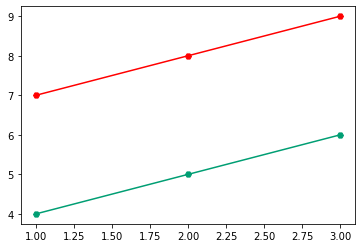

In [2]:
import matplotlib.pyplot as plt

x = [1,2,3]
y = [4,5,6]
z = [7,8,9]
fig,ax = plt.subplots()
ax.plot(x,y,color='#009e73',marker = "H")
ax.plot(x,z,color='red',marker = "H")